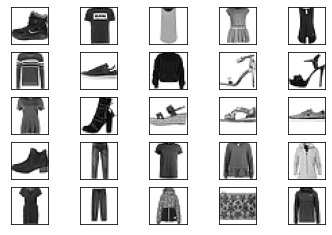

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag'
'Ankle boot']

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5


TypeError: ignored

In [12]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [13]:
def print_image_summary(image, labels):
  print('-'*30)
  print('Image Details:')
  print('-'*30)
  print(f'Image dimensions: {image.shape}')
  print('Channels:')

  if len(labels) == 1:
    image = image[..., np.newaxis]

  for i, lab in enumerate(labels):
    min_val = np.min(image[:,:,i])
    max_val = np.max(image[:,:,i])
    print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

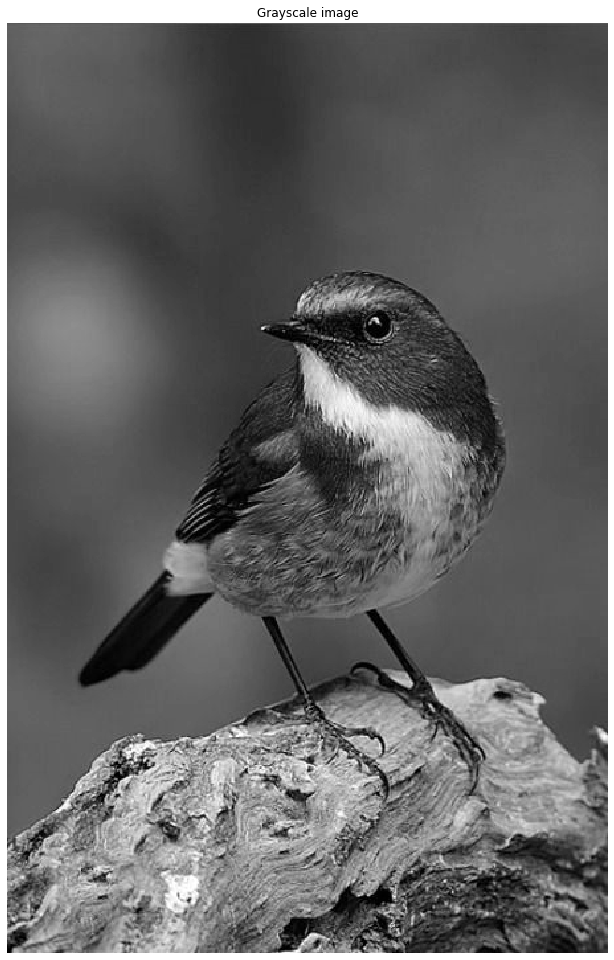

In [14]:
image_gs=imread("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/bird.jpg", as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title("Grayscale image")
ax.axis('off');

In [15]:
print_image_summary(image_gs,['G'])

------------------------------
Image Details:
------------------------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [16]:
X_train_final = x_train.reshape((-1,28,28,1))/255.
X_test_final = x_test.reshape((-1,28,28,1))/255.

In [20]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_with_conv.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [23]:
# model_with_conv.fit(X_train_final,y_train,epochs=5)
model_with_conv.evaluate(X_test_final,y_test,verbose=2)

313/313 - 3s - loss: 2.3026 - accuracy: 0.1000 - 3s/epoch - 10ms/step


[2.3026294708251953, 0.10000000149011612]

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
model = ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

102967424/102967424 [==============================] - 1s 0us/step


In [28]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [29]:
model.trainable=False
model = Sequential([
    model, Dense(2,activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_12 (Dense)            (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [30]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
BATCH_SIZE=32
image_height=224
image_width=224
train_dir = "/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/catanddog/train"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/catanddog/validation"

train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid = ImageDataGenerator(
    rescale=1.0/255.0
)

valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    epochs=3,
    validation_data=valid_generator,
    verbose=2
)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/3
13/13 - 94s - loss: 0.6932 - accuracy: 0.4909 - val_loss: 0.6932 - val_accuracy: 0.4592 - 94s/epoch - 7s/step
Epoch 2/3
13/13 - 53s - loss: 0.6934 - accuracy: 0.4571 - val_loss: 0.6932 - val_accuracy: 0.5000 - 53s/epoch - 4s/step
Epoch 3/3
13/13 - 53s - loss: 0.6933 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.5000 - 53s/epoch - 4s/step


Text(0.5, 1.0, 'Loss')

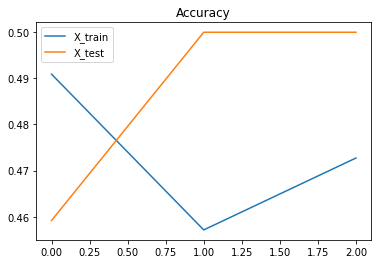

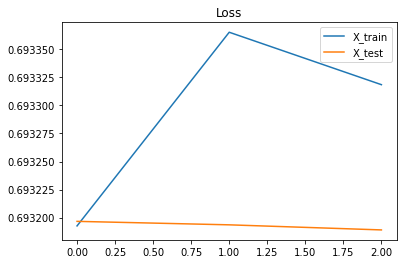

In [41]:
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

# font_fname = 'C:/Windows/Fonts/Calibri/calibril.ttf'
# font_family = font_manager.FontProperties(fname=font_fname).get_name()

# plt.rcParams["font.family"]=font_family

accuracy = history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='X_train')
plt.plot(epochs, val_accuracy, label='X_test')
plt.legend()
plt.title("Accuracy")
plt.figure()

plt.plot(epochs, loss, label='X_train')
plt.plot(epochs, val_loss, label='X_test')
plt.legend()
plt.title("Loss")

1/1 [==============================] - 3s 3s/step


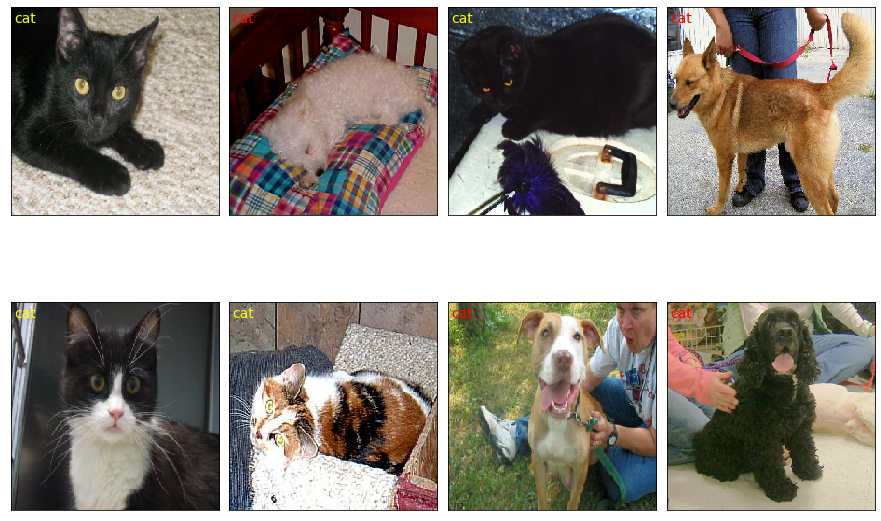

In [44]:
class_names=['cat','dog']
validation, label_batch=next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
  ax = fig.add_subplot(2,4,i+1, xticks=[], yticks=[])
  ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3,17,class_names[prediction_values[i]], color='yellow', fontsize=14)
  else:
    ax.text(3,17,class_names[prediction_values[i]], color='red', fontsize=14)


In [45]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224,224,3),
                   trainable=False),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [46]:
train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid = ImageDataGenerator(
    rescale=1.0/255.0
)

valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [47]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=valid_generator,
    verbose=2
)

Epoch 1/3
13/13 - 148s - loss: 0.4727 - accuracy: 0.8312 - val_loss: 0.2771 - val_accuracy: 0.9286 - 148s/epoch - 11s/step
Epoch 2/3
13/13 - 135s - loss: 0.1550 - accuracy: 0.9766 - val_loss: 0.1133 - val_accuracy: 0.9592 - 135s/epoch - 10s/step
Epoch 3/3
13/13 - 141s - loss: 0.0881 - accuracy: 0.9740 - val_loss: 0.0818 - val_accuracy: 0.9796 - 141s/epoch - 11s/step


Text(0.5, 1.0, 'Loss')

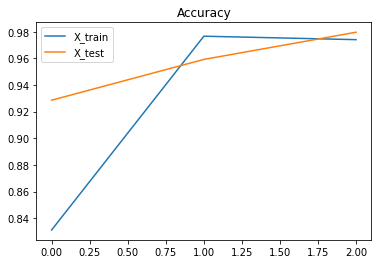

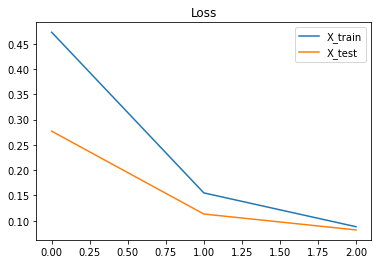

In [48]:
accuracy = history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='X_train')
plt.plot(epochs, val_accuracy, label='X_test')
plt.legend()
plt.title("Accuracy")
plt.figure()

plt.plot(epochs, loss, label='X_train')
plt.plot(epochs, val_loss, label='X_test')
plt.legend()
plt.title("Loss")

1/1 [==============================] - 10s 10s/step


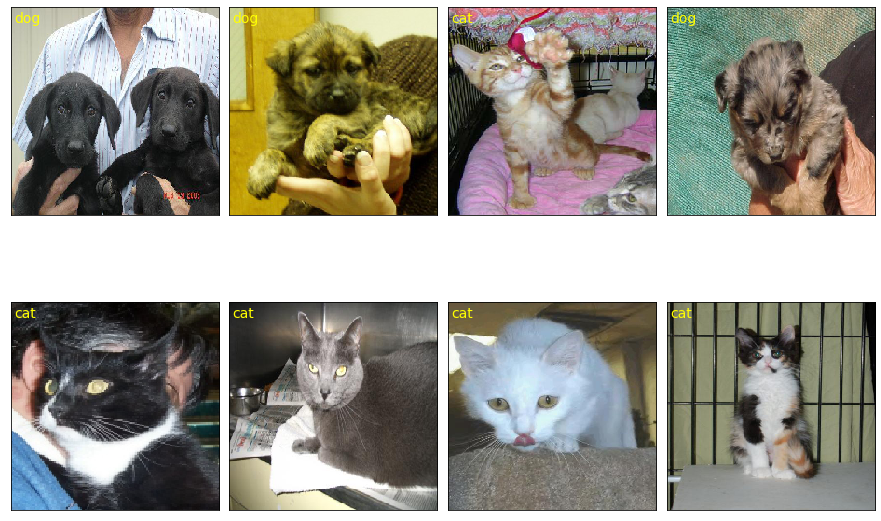

In [49]:
class_names=['cat','dog']
validation, label_batch=next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
  ax = fig.add_subplot(2,4,i+1, xticks=[], yticks=[])
  ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3,17,class_names[prediction_values[i]], color='yellow', fontsize=14)
  else:
    ax.text(3,17,class_names[prediction_values[i]], color='red', fontsize=14)


In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),activation='relu', kernel_size=(5,5),filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu',kernel_size=(5,5),filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu',kernel_size=(5,5),filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu',kernel_size=(5,5),filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax'),
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)        

In [54]:
ins=model.inputs
outs=model.layers[0].output
feature_map=Model(inputs=ins,outputs=outs)
feature_map.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 100, 100, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


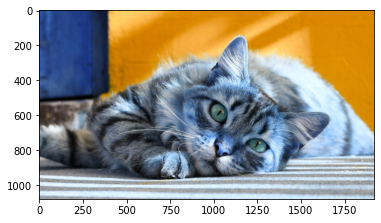

In [55]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/cat.jpg")
plt.imshow(img)

1/1 [==============================] - 0s 14ms/step


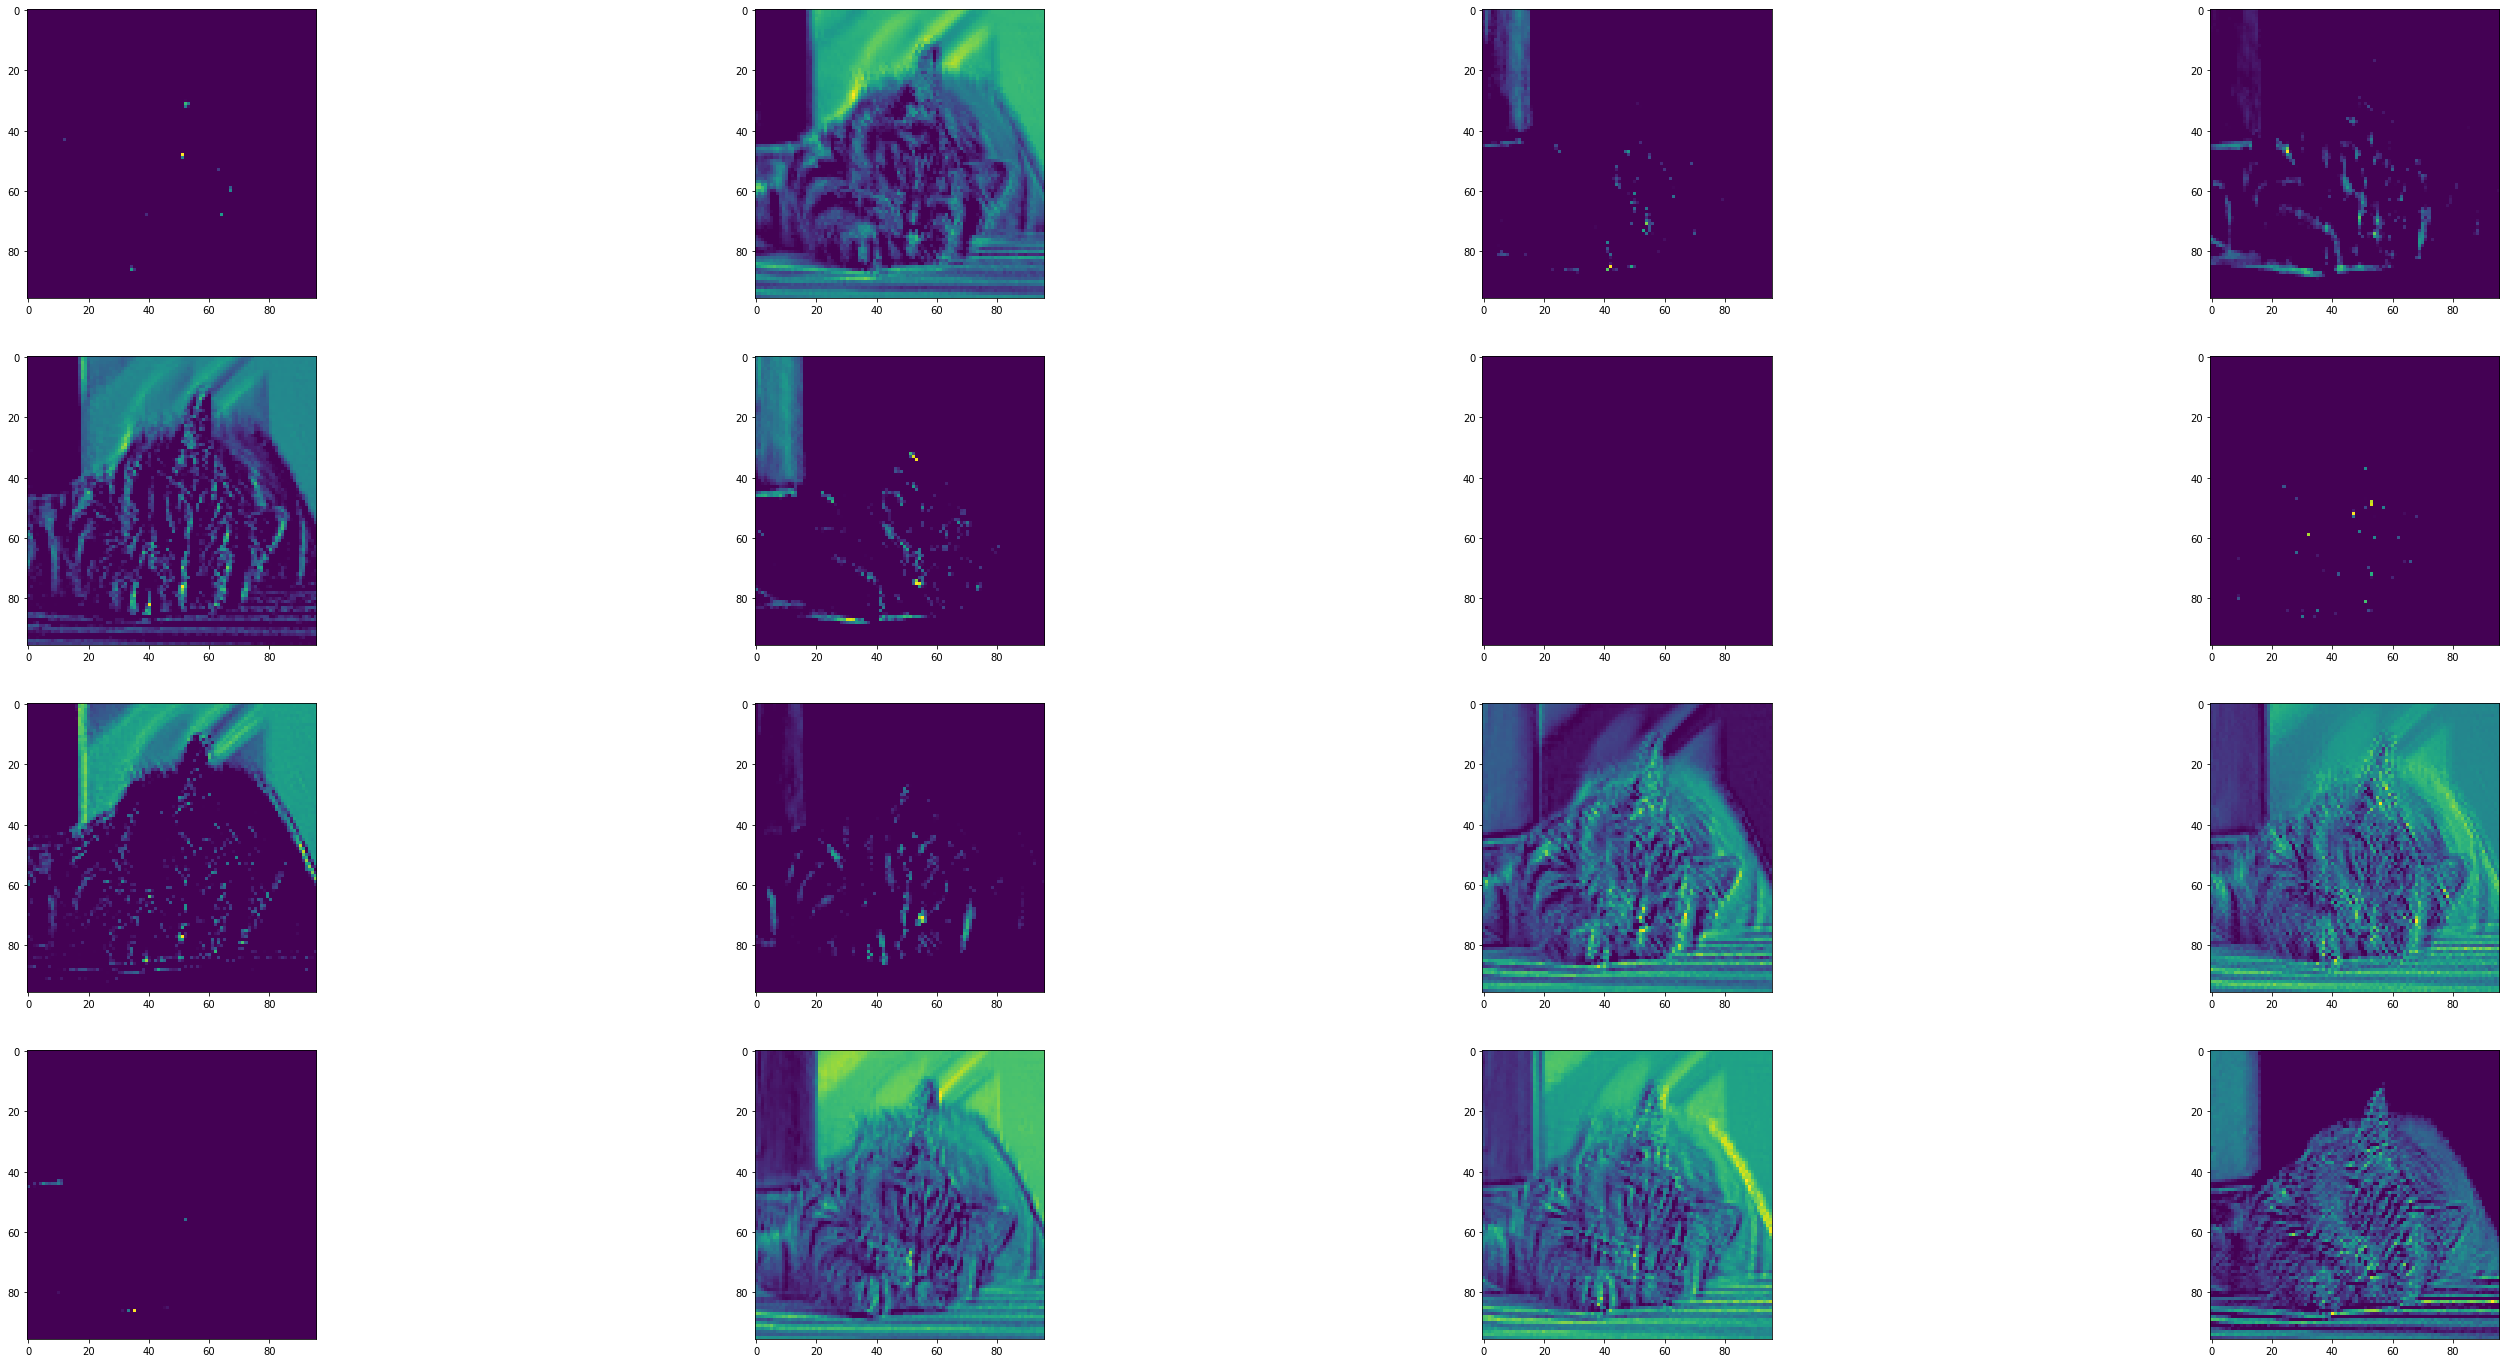

In [59]:
img = cv2.resize(img,(100,100))
input_img=np.expand_dims(img, axis=0)
# print(input_img.shape)

feature = feature_map.predict(input_img)
# print(feature)
fig=plt.figure(figsize=(50,50))
for i in range(16):
  ax=fig.add_subplot(8,4,i+1)
  ax.imshow(feature[0,:,:,i])

1/1 [==============================] - 0s 42ms/step


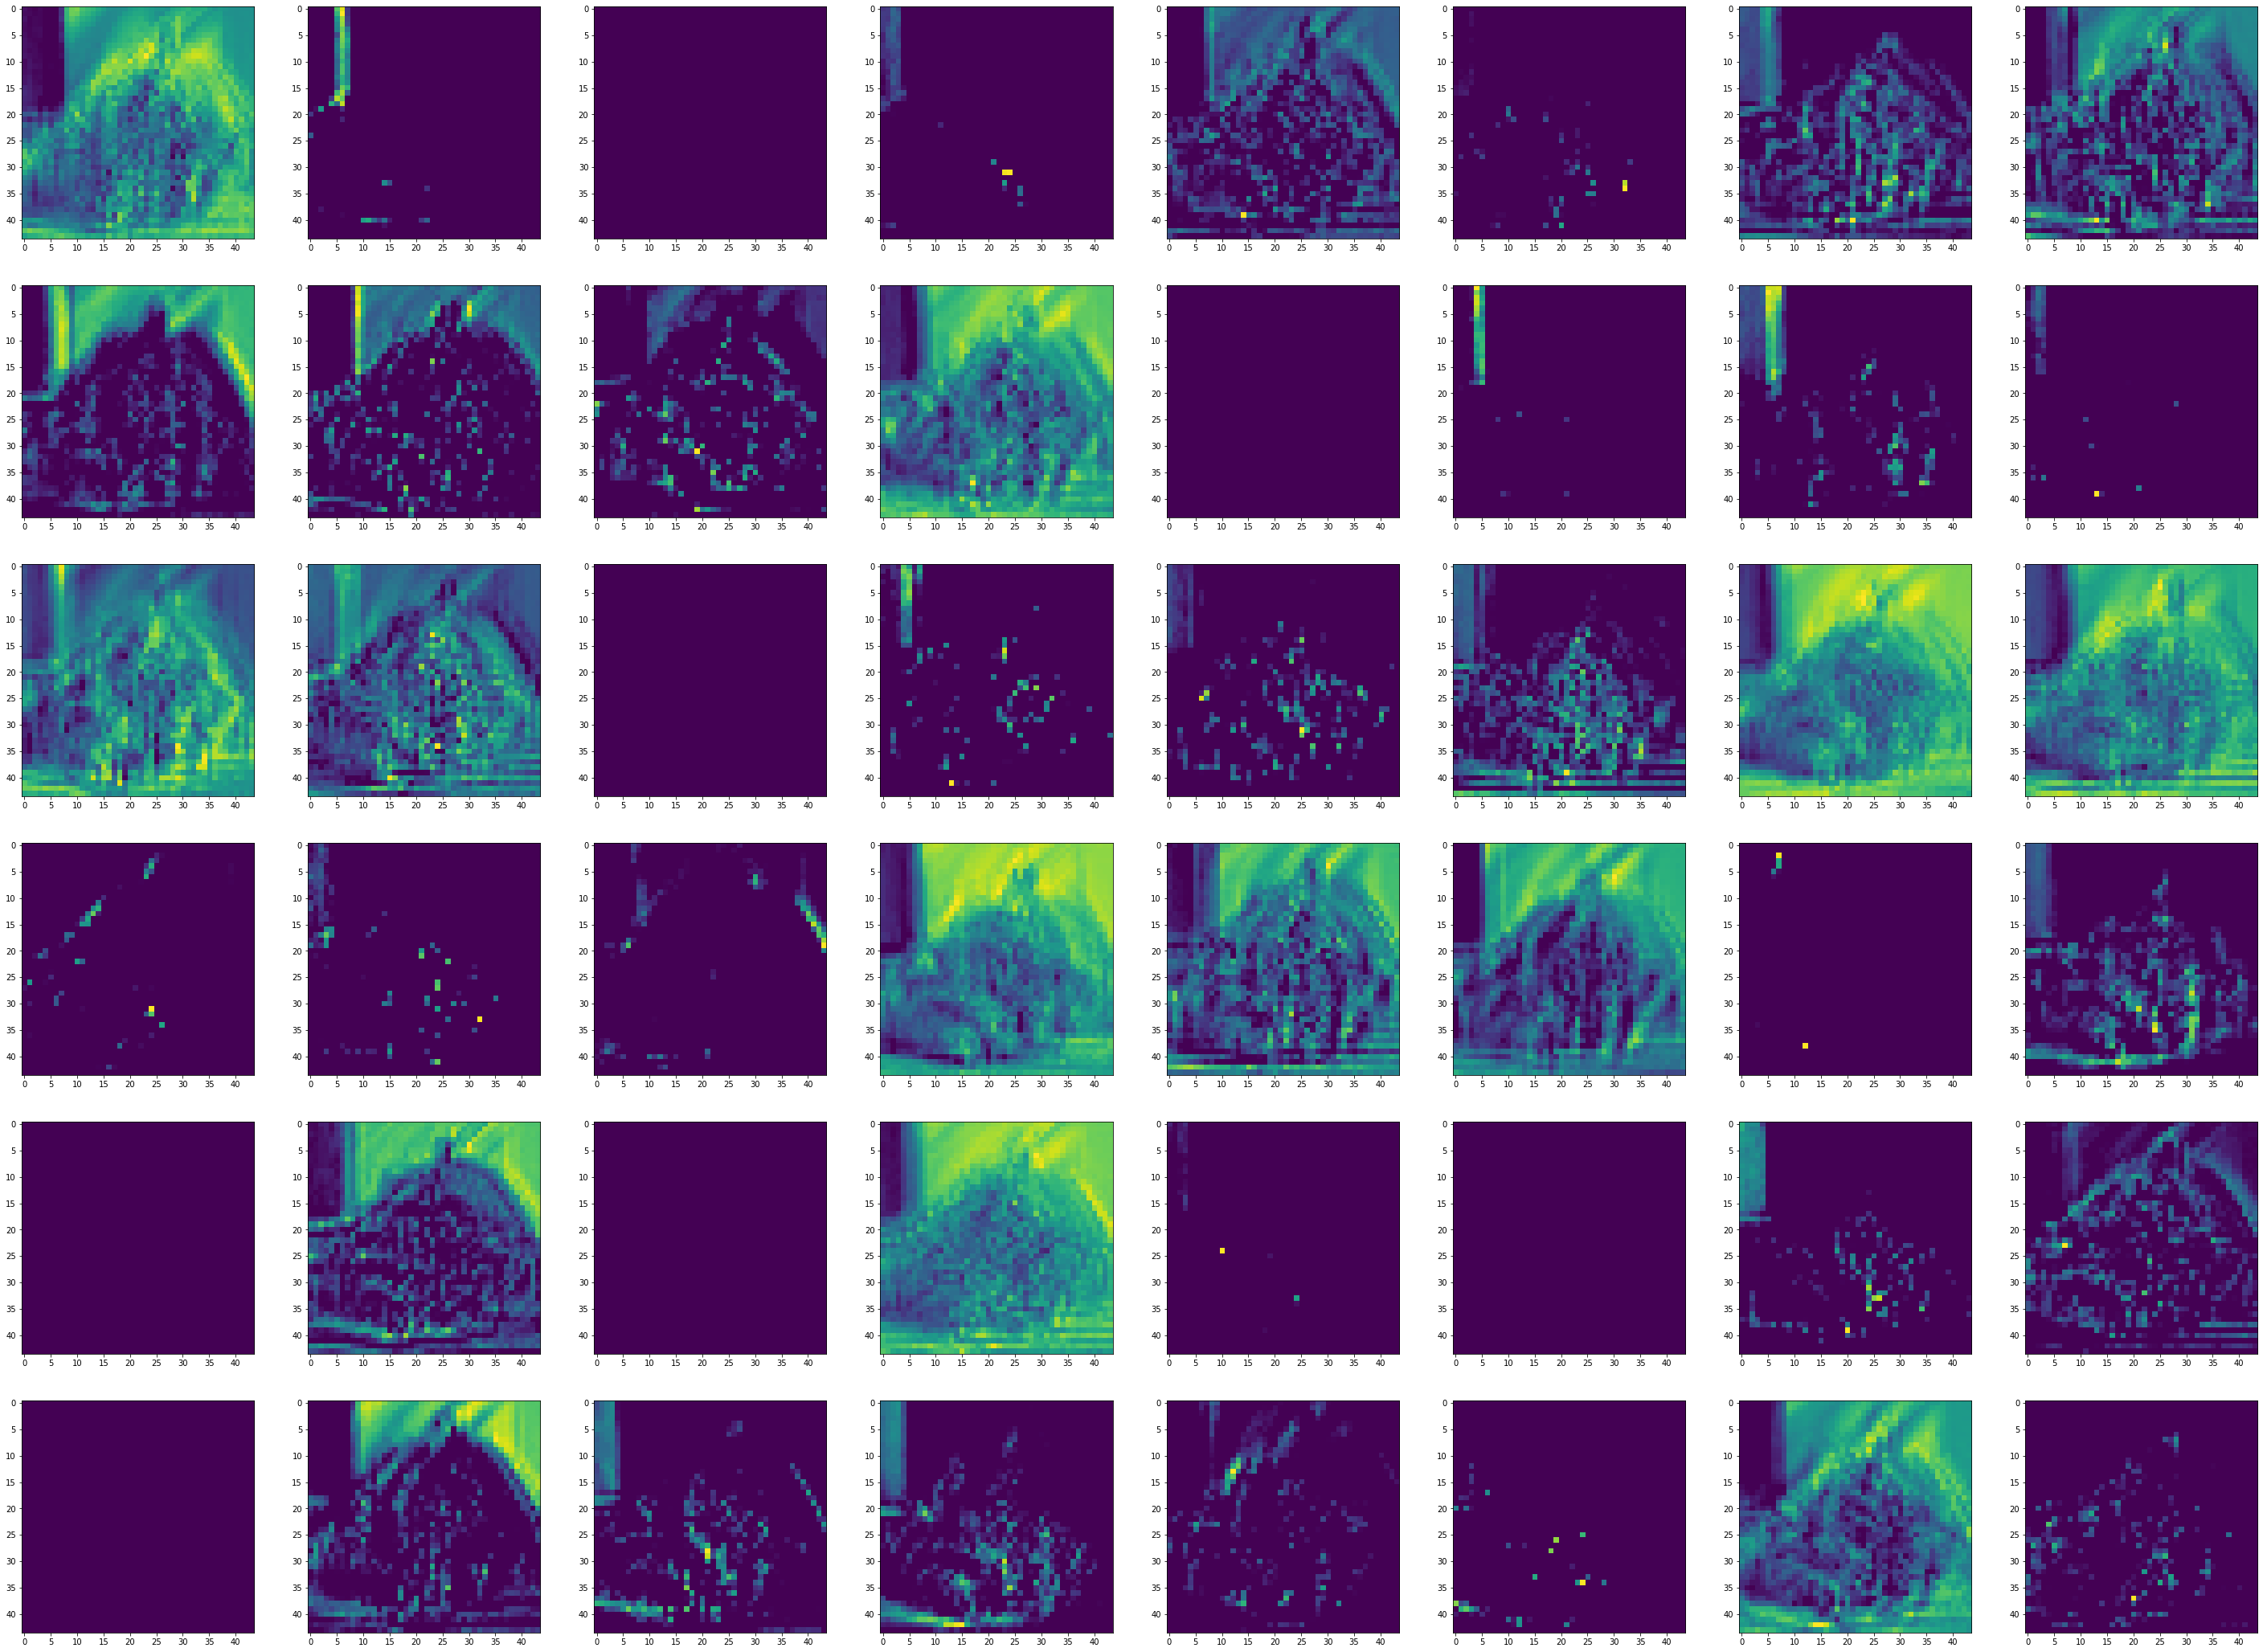

In [60]:
ins = model.inputs
outs =model.layers[2].output
feature_map = Model(inputs=ins,outputs=outs)

img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/cat.jpg")
img=cv2.resize(img,(100,100))
input_img=np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig=plt.figure(figsize=(50,50))
for i in range(48):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(feature[0,:,:,i])

1/1 [==============================] - 0s 74ms/step


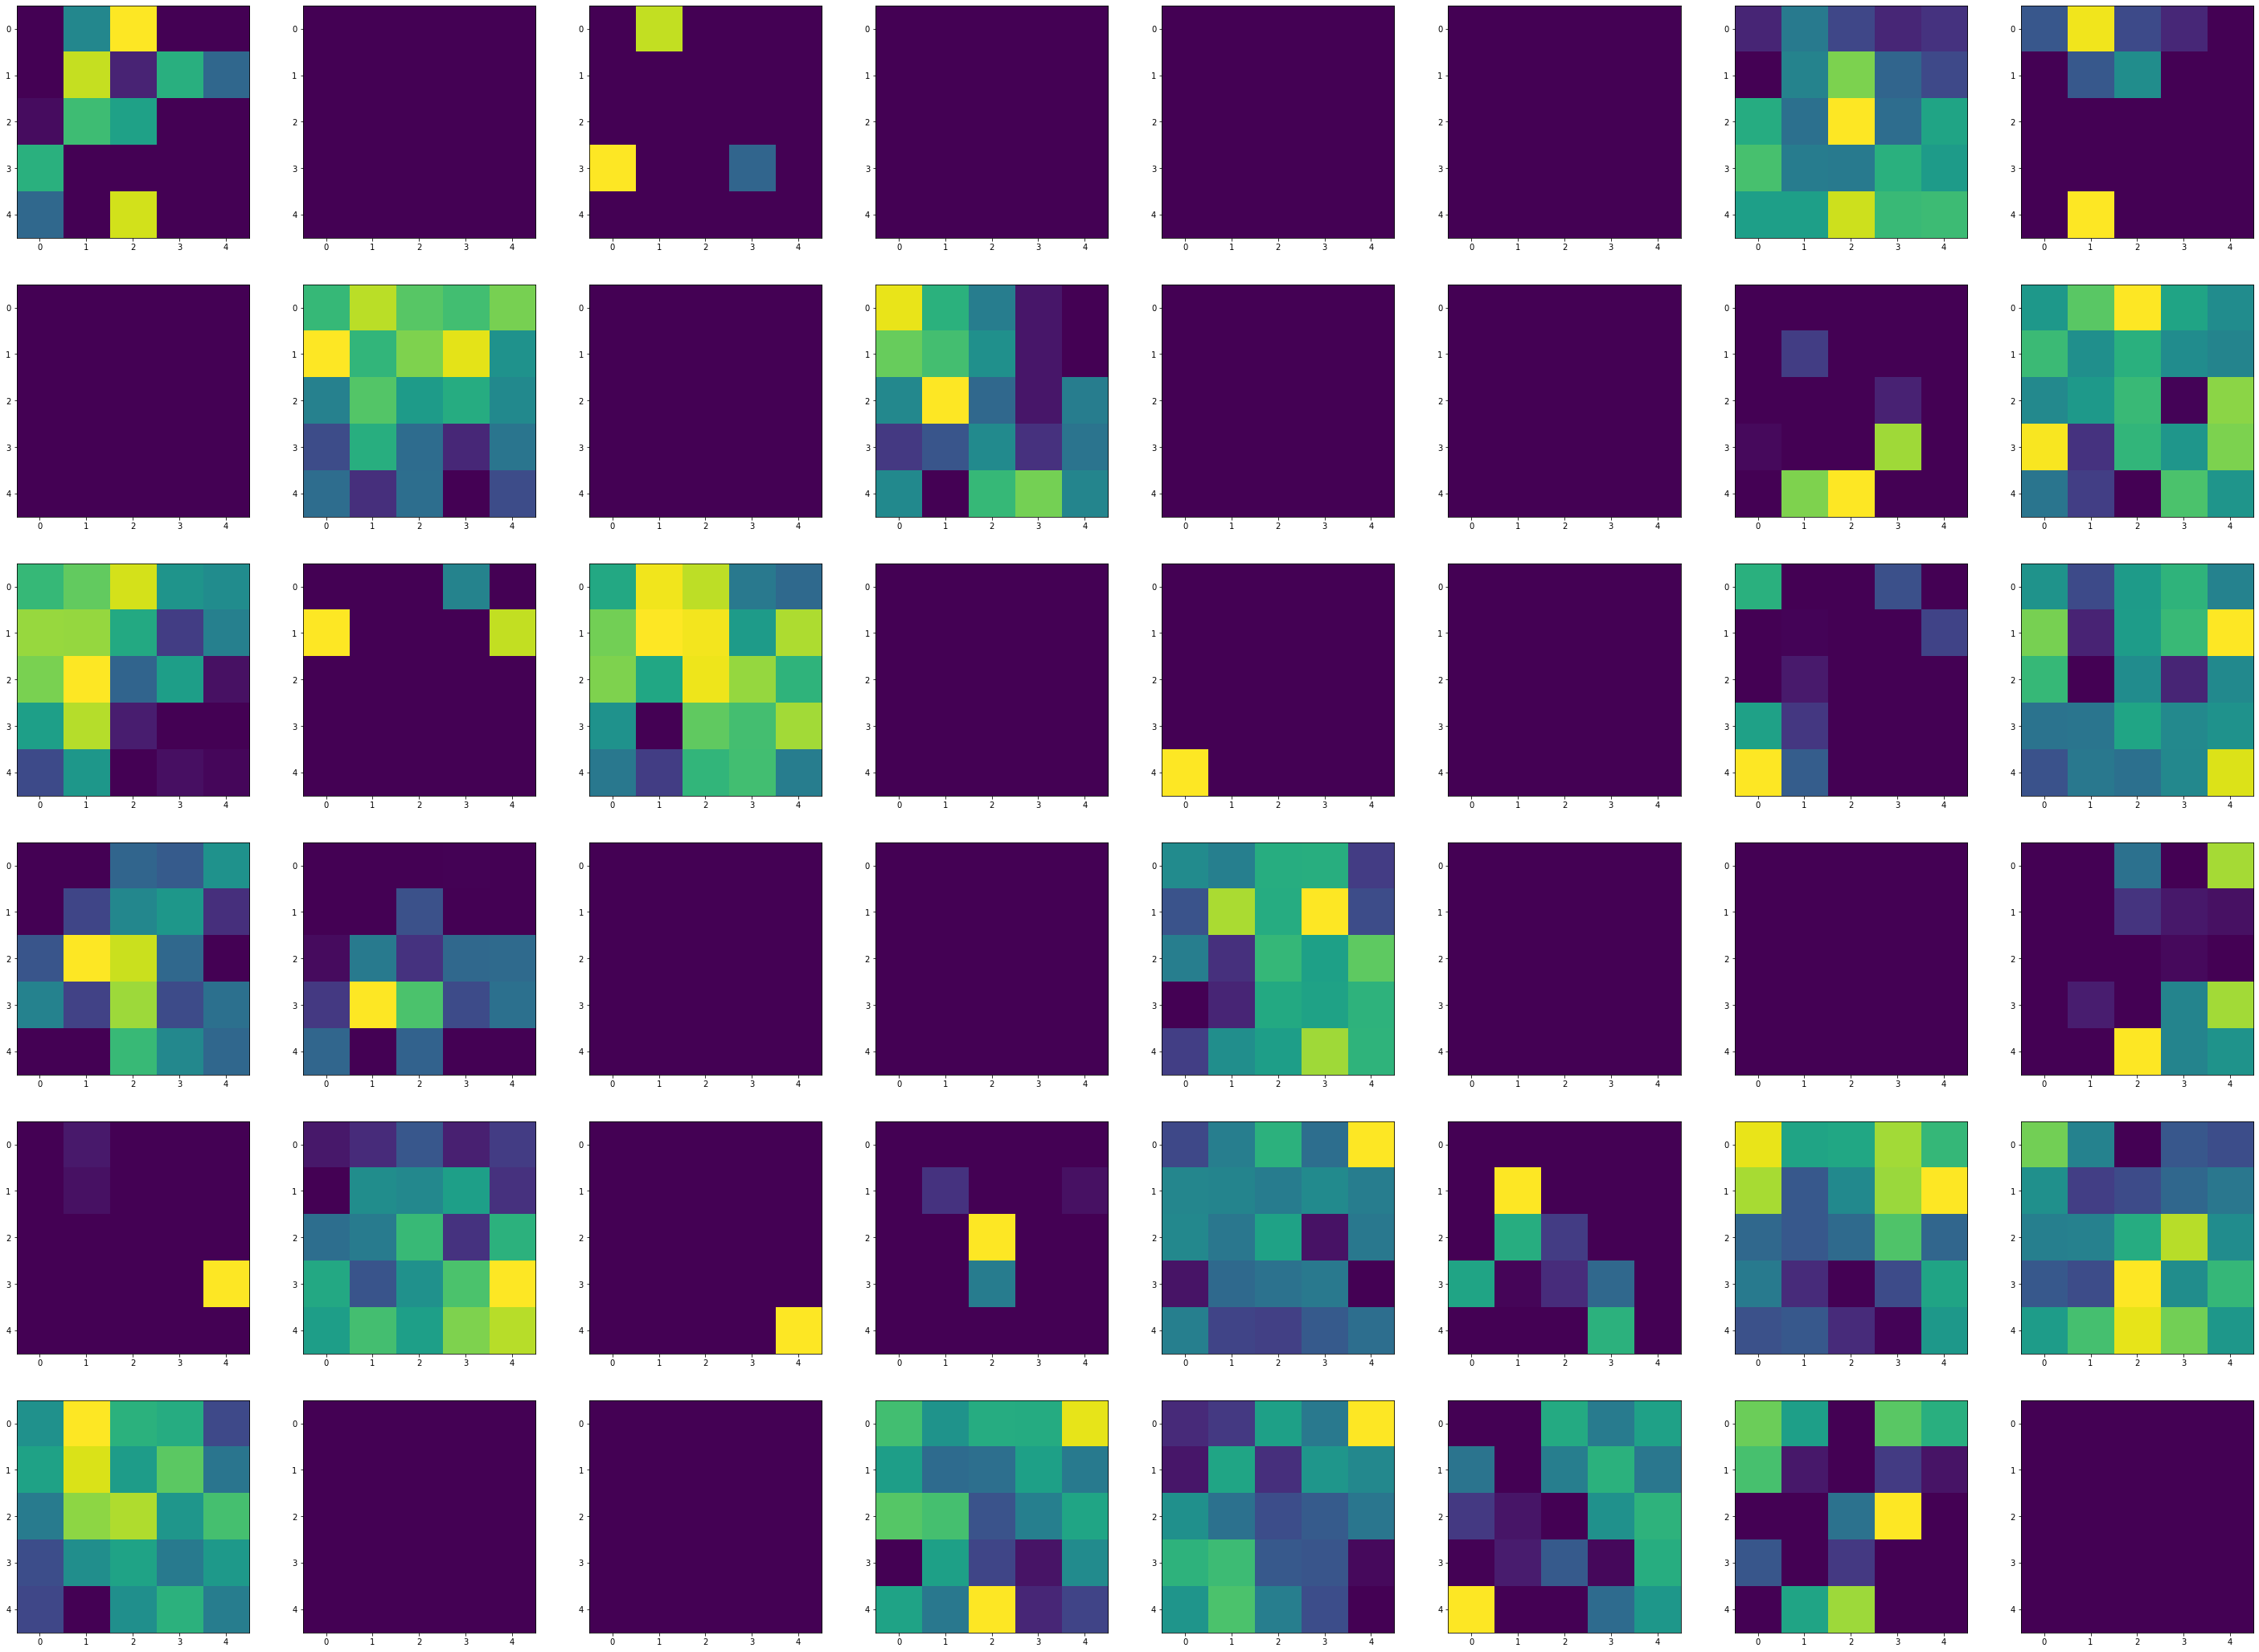

In [61]:
ins = model.inputs
outs =model.layers[6].output
feature_map = Model(inputs=ins,outputs=outs)

img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch05/data/cat.jpg")
img=cv2.resize(img,(100,100))
input_img=np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig=plt.figure(figsize=(50,50))
for i in range(48):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(feature[0,:,:,i])